In [8]:
import numpy as np 
from qiskit_aer import Aer
from qiskit import  QuantumCircuit,transpile
from qiskit.visualization import plot_histogram


In [ ]:
# settinf length of n-bit string]
n=3
## that means 8 total inputs 

Making a constant oracle now. A function or unitary matrix in which the input has no input on the output. It delivers the same output everytime.

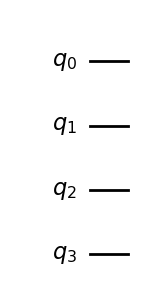

In [51]:
n=3
const_oracle= QuantumCircuit(n+1) # i assume the +1 is for the ancilla qubit
output = np.random.randint(2)
if output ==0:
    const_oracle.x(n)
const_oracle.draw('mpl')



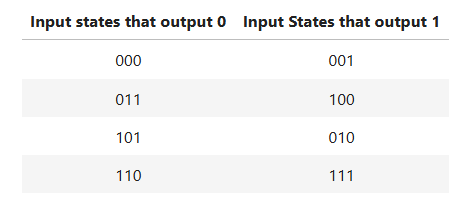


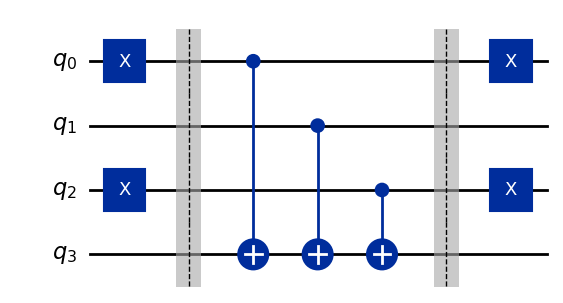

In [52]:
##balacned oracle now
balancedOracle= QuantumCircuit(n+1)
b_str="101"
#print(len(b_str))
#placing x gates
for qubit in range(len(b_str)):
    if b_str[qubit]=='1':
        balancedOracle.x(qubit)
#barrier
balancedOracle.barrier()

for qubit in range(n):
    balancedOracle.cx(qubit,n)
balancedOracle.barrier()

#reversing the x gates
for qubit in range(len(b_str)):
    if b_str[qubit]=='1':
        balancedOracle.x(qubit)

balancedOracle.draw('mpl')



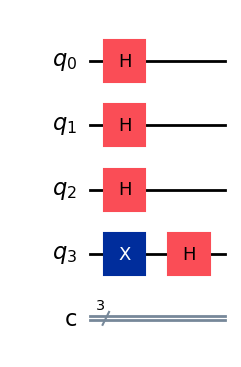

In [61]:
# lets dive into the algorithm now. To make use of phase oracle and deutsch algorithm
# we will need the input states to be in the state |+> and the output bit to be in |-> state

djCircuit= QuantumCircuit(n+1,n)

## applying hadamard gates to input bits
for qubit in range(n):
    djCircuit.h(qubit)

## put qubit in state |->
djCircuit.x(n)
djCircuit.h(n)

djCircuit.draw('mpl')

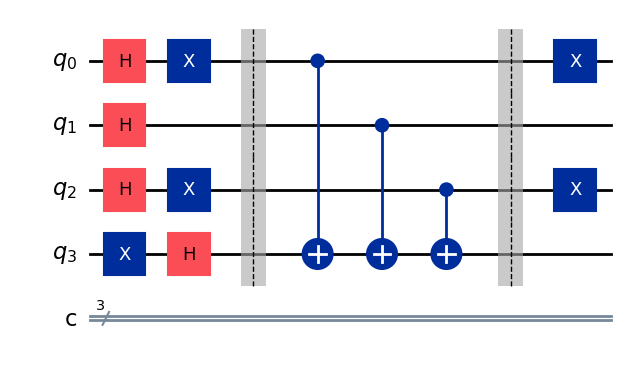

In [62]:
## lets apply the balanced oracle now 
djCircuit = djCircuit.compose(balancedOracle)
djCircuit.draw('mpl')


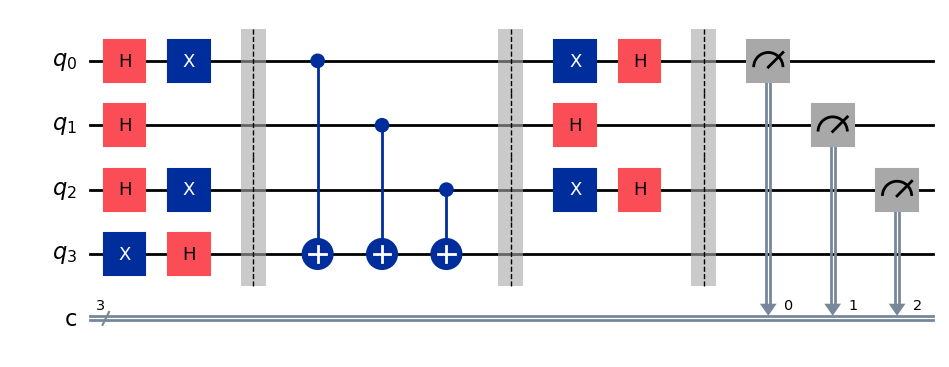

In [63]:
## applying h gates again to all the input qubits for measurement
for qubit in range(n):
    djCircuit.h(qubit)
djCircuit.barrier()

for i in range(n):
    djCircuit.measure(i,i)

###display
djCircuit.draw('mpl')

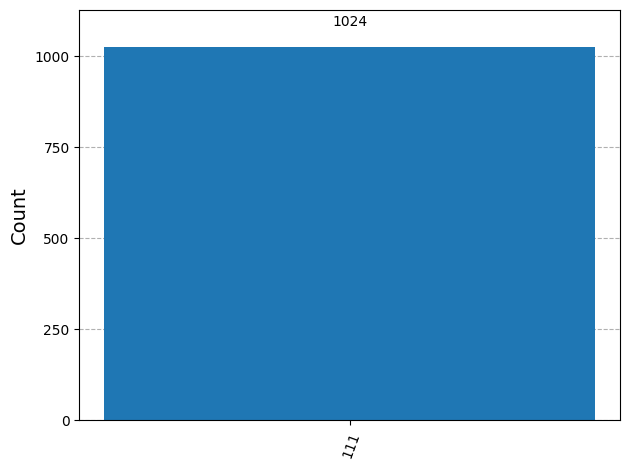

In [64]:
#using simulator
aer_sim= Aer.get_backend('aer_simulator')
results = aer_sim.run(djCircuit).result()
answer = results.get_counts()

plot_histogram(answer)

### We got 0 counts for 000 which means for sure this is a balanced function as we know otherwise we would have gotten probability of measuring 000 by 1.